In [2]:
from tod import CSV_Reader, WormViewer
import cv2
import numpy as np
import time
from utils import *
from tqdm import tqdm

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["figure.figsize"] = (20,3)


from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Video

%load_ext autoreload
%autoreload 2

In [3]:
def draw_from_output(img, outputs, col=(255,255,0), text=None):
    """ Img is cv2.imread(img) and outputs are (x1, y1, x2, y2, conf, cls_conf)
    Returns the image with all the boudning boxes drawn on the img """
    for output in outputs:
        # output = [float(n) for n in output]
        x1, y1, w, h= output
        x1, y1, x2, y2 = int(x1), int(y1), int(x1 + w), int(y1 + h)
        cv2.rectangle(img, (x1,y1), (x2,y2), col, 2)

        if text is not None:
            cv2.putText(img, f"{round(float(conf), 3) : }{text}",
                        (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, col, 2)

            
# Helper Functions
def get_worms(image, bbs):
    """ Takes image and list of bbs and returns a list of the
    cutouts for each worm"""
    worms = []
    for bb in bbs:
        bb = bb.astype(int)
        x, y, w, h = bb
        worm = image[y:y+h, x:x+w]
        worms.append(worm)
    
    return worms


def display_worms(worms: list[np.ndarray]):
    """List of worm images and then makes a figure with all
    the worms"""
    worm_count = len(worms)
    fig = plt.figure()
    
    for i in range(worm_count):
        fig.add_subplot(1, worm_count, i + 1)
        plt.imshow(worms[i])
    
    plt.show(block=True)

In [4]:
csv_path = "./data/1046.csv"
vid_path = "./data/1046.avi"

processer = CSV_Reader(csv_path, vid_path)
frame, bbs = processer.get_worms_from_frame(2400)
results = processer.get_worms_from_end(2400, 20)

Determining Experiment End


100%|██████████| 25/25 [00:00<00:00, 30.22it/s]


Experiment Done @ Frame 2100


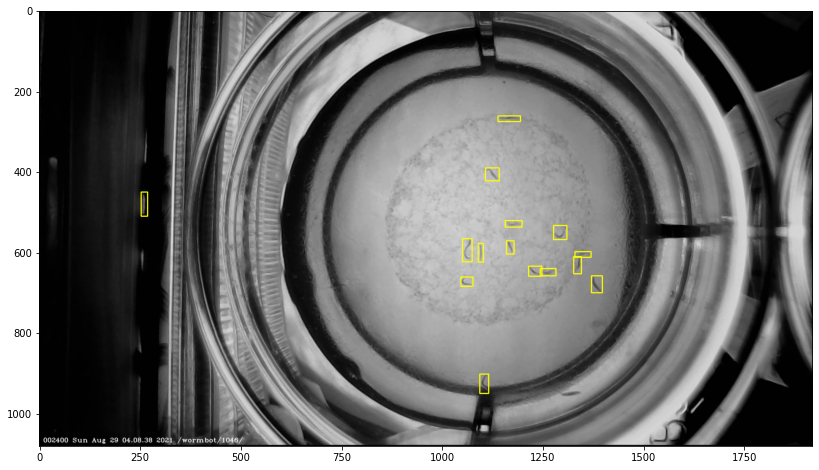

In [5]:
plt.figure(figsize=(20,8))

last = frame.copy()
draw_from_output(last, processer.tracked)
plt.imshow(last)

## Above shows the tracked frame.
___It's done by getting all detections for last 20 frames and then doing nms to isolate unique___

Next will itterate through the frames in reverse and will analyze the dedicated bounding box in each frame.

Determining Experiment End


100%|██████████| 25/25 [00:00<00:00, 30.02it/s]


Experiment Done @ Frame 2100
Processing in reverse from 2400


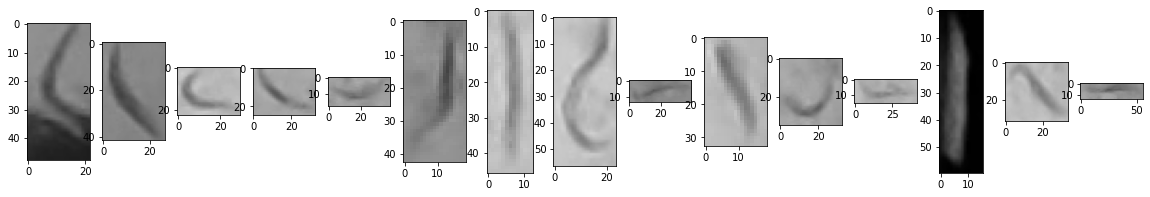

15

In [5]:
viewer = WormViewer(csv_path, vid_path, first=2400)
worms = viewer.fetch_worms(np.arange(0, 15, 1), 2400)
display_worms(worms)
len(viewer.tracked)

In [6]:
# Make worm video by worm id if video is true.
video = False

if video == True:
    for i in range(len(viewer.tracked)):
        viewer.create_worm_video(i, 1500)
        
# viewer.create_worm_video(2, 2000)

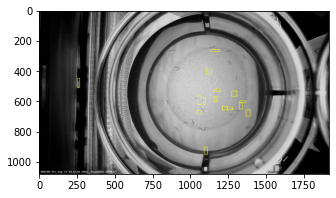

In [7]:
_, t = processer.get_frame(100)
draw_from_output(t, processer.tracked)
plt.imshow(t)

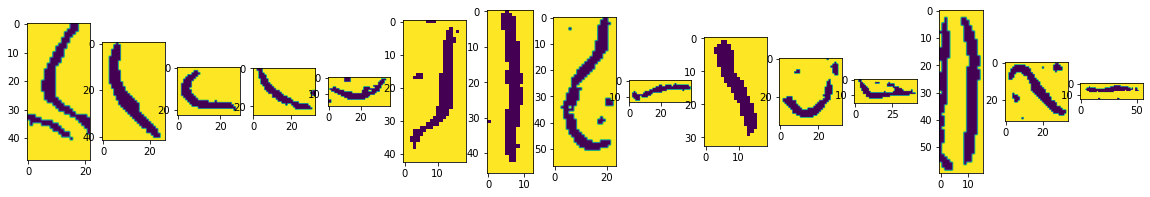

In [8]:
transformed = viewer.transform_all_worms(worms)
display_worms(transformed)

In [9]:
# Determine time of death from the experiment
# Also determine how long it takes to process.
start = time.time()

scores = viewer.compute_score()

delta = time.time() - start
print(f"took: {delta} seconds. \n Fviewer count: {viewer.scan} \n Worm count: {len(viewer.tracked)}")

  4%|▍         | 4/100 [00:00<00:03, 26.31it/s]

skipping empty
skipping empty
skipping empty


100%|██████████| 100/100 [00:17<00:00,  5.82it/s]

took: 17.180212020874023 seconds. 
 Fviewer count: 2000 
 Worm count: 15


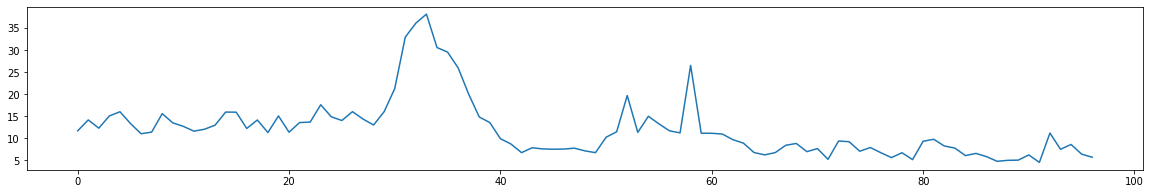

In [10]:
plt.plot(scores[0])

In [11]:
# scores[5]

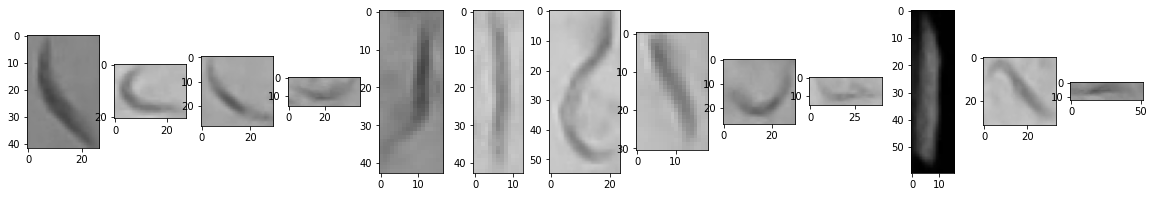

In [12]:
frame, bbs = viewer.get_worms_from_frame(2400)
worms = get_worms(frame, bbs)
display_worms(worms)

In [13]:
viewer.worm_state

{0: 1720,
 1: 1860,
 2: 1300,
 3: 1540,
 4: 2240,
 5: 1460,
 6: 1960,
 7: 1820,
 8: 1900,
 9: 1700,
 10: 1380,
 11: 1400,
 12: 1760,
 13: 1560,
 14: 1240}

In [14]:
viewer.save_scored_data(1047)

In [15]:
plt.imshow(viewer.older[8, 9])

IndexError: index 8 is out of bounds for axis 0 with size 5

In [ ]:
viewer.exp_end

## TEST NEW TRACKER UPDATERcsv_path = "./data/1046.csv"
vid_path = "./data/1046.avi"

In [275]:
csv_path = "./exp/csvs/351.csv"
vid_path = "./exp/vids/351.avi"
viewer = WormViewer(csv_path, vid_path, first=1000)

Determining Experiment End


100%|██████████| 12/12 [00:00<00:00, 20.30it/s]


Experiment Done @ Frame 1100
Processing in reverse from 1000


In [276]:
viewer.df[viewer.df["frame"].between(100, 105)]

,frame,x,y,w,h,class
2919,100.0,783,825,64,21,worm
2920,100.0,993,718,50,21,worm
2921,100.0,956,696,39,32,worm
2922,100.0,978,648,34,41,worm
2923,100.0,1007,621,49,27,worm
...,...,...,...,...,...,...
3091,105.0,1437,217,27,42,worm
3092,105.0,1472,206,47,20,worm
3093,105.0,1078,160,44,47,worm
3094,105.0,969,149,55,18,worm


In [277]:
def xywh_to_xyxy(bbs):
    x1 = bbs[:, 0]
    y1 = bbs[:, 1]
    w = bbs[:, 2]
    h = bbs[:, 3]

    x2 = x1 + w
    y2 = y1 + h

    return x1, y1, x2, y2




def update_tracked_old(tracked, futures, thresh=0.8):
    """ Matches and updates the list of tracked worms
    with the new bounding boxes.

    tracked -> list of tracked bounding boxes
    futures -> list of possible new bounding boxes
    iou -> iou thresh to move bounding box
    """
    for i, track in enumerate(tracked):
        stack = np.tile(track, (len(futures), 1))
        stack2 = xywh_to_xyxy(stack)

        a2 = xywh_to_xyxy(futures)

        # Find overlaped box.
        xx1 = np.maximum(stack2[0], a2[0])
        yy1 = np.maximum(stack2[1], a2[1])
        xx2 = np.minimum(stack2[2], a2[2])
        yy2 = np.minimum(stack2[3], a2[3])

        # Compute area for each section
        area_stack = stack[:, 2] * stack[:, 3]
        area_a = futures[:, 2] * futures[:, 3]

        w = np.maximum(0, xx2 - xx1)
        h = np.maximum(0, yy2 - yy1)

        area = w * h
        # Calculate intersection / union
        iou = area / (area_stack + area_a - area)
        assert(iou.all() >= 0)
        assert(iou.all() <= 1)

        match_idx = np.argmax(iou)
        iou_val = iou[match_idx]
#         print(iou)


        if iou_val >= thresh:
            tracked[i] = futures[match_idx]
            print("updated bb,", i)
#         print(iou_val, track, a[match_idx])


# update_tracked_old(b, a)


## Make dynamic bounding box video.

In [278]:
from models import WormClassifier, WormDataLoader, pre_process_img
from tod import CSV_Reader, WormViewer


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [279]:
MASK_MODEL = True

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)

model = WormClassifier()
model.load_state_dict(torch.load("weights/best-model-mask.pt", map_location=device))

cpu


<All keys matched successfully>

In [280]:
def get_img_features(img):
    img = pre_process_img(img, mask_model=MASK_MODEL)
    x, feat = model.forward(img, features=True)
    feat = feat.detach().numpy()[0]
    return x, feat


def bulk_features(img_list):
    features = []
    for worm in img_list:
        x, feature = get_img_features(worm)
        features.append(feature)
    return features


def find_worm_match(worm, worms):
    distances = []
    for w in worms:
        dist = np.linalg.norm(worm - w)
        distances.append(dist)
        
    match = np.argmin(distances)
    return match, distances[match]



In [281]:
worm_ids = np.arange(0, len(viewer.tracked))
state = {i: {"count": 0, "state": False, "death": False} for i in worm_ids}
print(state)

{0: {'count': 0, 'state': False, 'death': False}, 1: {'count': 0, 'state': False, 'death': False}, 2: {'count': 0, 'state': False, 'death': False}, 3: {'count': 0, 'state': False, 'death': False}, 4: {'count': 0, 'state': False, 'death': False}, 5: {'count': 0, 'state': False, 'death': False}, 6: {'count': 0, 'state': False, 'death': False}, 7: {'count': 0, 'state': False, 'death': False}, 8: {'count': 0, 'state': False, 'death': False}, 9: {'count': 0, 'state': False, 'death': False}, 10: {'count': 0, 'state': False, 'death': False}, 11: {'count': 0, 'state': False, 'death': False}, 12: {'count': 0, 'state': False, 'death': False}, 13: {'count': 0, 'state': False, 'death': False}, 14: {'count': 0, 'state': False, 'death': False}, 15: {'count': 0, 'state': False, 'death': False}, 16: {'count': 0, 'state': False, 'death': False}, 17: {'count': 0, 'state': False, 'death': False}, 18: {'count': 0, 'state': False, 'death': False}, 19: {'count': 0, 'state': False, 'death': False}, 20: {'cou

In [282]:
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
writer = cv2.VideoWriter("updated351_test.avi", fourcc, 10, (1920, 1080), True)
first = True


for frame_id in tqdm(range(viewer.frame_count, 0, -1)):
    _, frame = viewer.get_frame(frame_id)
    
    if frame_id % 5 == 0 or frame_id == viewer.frame_count:
#         print(viewer.tracked)
       updated = viewer.update_tracked(frame_id, thresh=0.5)
    
    worm_ids = np.arange(0, len(viewer.tracked))
    worms = viewer.fetch_worms(worm_ids, frame_id, pad=1, auto=True)
    features = bulk_features(worms)
    
    if first:
        reference = features
        first = False
    
    for i, bb in enumerate(viewer.tracked):
        # Ignore if screen shakes
#         if len(updated) == 0:
#             continue
        
        worm = worms[i]
        pre = pre_process_img(worm, mask_model=MASK_MODEL)
        cls_pred, feat = model.forward(pre, features=True)
        # Compare class
        if cls_pred[0][0] > 0.5:
            color = (0, 255, 0)
            present = True
        else:
            color = (255, 0, 0)
            present = False
        
        # Compare closest worm:
        match, distance = find_worm_match(reference[i], features)
#         print(i, match)
        text = "False"
        is_match = False
        if match == i:
            if distance < 15: 
                text = f"Match: {int(distance)}"
                is_match = True
            else:
                text = f"False: {int(distance)}"
        
        if i in updated and is_match:
            if present:
                state[i]["count"] = max(0, state[i]["count"] - 10)
                if state[i]["count"] == 0:
                    state[i]["state"] = False
            else:
                state[i]["count"] = max(0, state[i]["count"] - 5)
        elif i not in updated and not is_match:
            if present:
                state[i]["count"] = min(30, state[i]["count"] + 1)
            if not present:
                state[i]["count"] = min(30, state[i]["count"] + 3)
        elif is_match:
            state[i]["count"] = max(0, state[i]["count"] - 5)
                
                
        if state[i]["count"] > 5:
            color = (0, 0, 25)
            state[i]["state"] = True
            state[i]["death"] = frame_id
            
        if state[i]["state"] == True:
            color = (0, 0, 25)
        
        x, y, w, h = bb

        if i not in updated:
            cv2.circle(frame, (int(x), int(y)), 10, (0, 255, 0)) 
        else:
            cv2.circle(frame, (int(x), int(y)), 10, (0, 0, 255)) 

#             color = (0, 255, 255)
        
        cv2.rectangle(frame, (int(x),int(y)), (int(x+w), int(y+h)), color, 2)
        
        position = (int(x), int(y))
        cv2.putText(frame, text, position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) 
        
    writer.write(frame)

100%|██████████| 1160/1160 [06:43<00:00,  2.87it/s]


In [ ]:
t = np.array(pre[0])
p = t.repeat(3)
p = p.reshape(64,64,3)
plt.imshow(p)

In [ ]:
plt.imshow(pre[0].view(64,64,1))
# plt.imshow(worms[3])